# Import modules

In [1]:
import re
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [3]:
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

# import dataset (.csv)

In [4]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Datasets/tweets.csv'
DATASET_COLUMNS=['target','ids','date','flag','user','text']
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv(file_path, encoding=DATASET_ENCODING, names=DATASET_COLUMNS)
df.sample(5)

,target,ids,date,flag,user,text
446717,0,2068495354,Sun Jun 07 14:10:44 PDT 2009,NO_QUERY,AshVicious,@Kolbijean The same exact thing happened here ...
847441,4,1564585293,Mon Apr 20 04:09:09 PDT 2009,NO_QUERY,trashGold,@zackalltimelow happy birthday dudelet this t...
862893,4,1676993007,Sat May 02 00:00:48 PDT 2009,NO_QUERY,FBSmemberV,@ReaganGomez ur def like 21 u have a husband a...
105954,0,1823319178,Sat May 16 21:39:40 PDT 2009,NO_QUERY,piopi_tanya,Work sucks right now Friends save me
1398586,4,2054123357,Sat Jun 06 06:36:58 PDT 2009,NO_QUERY,Chrissyisms,@NewMeO_o goodmorning


# Preprocessing

## Deal with labels

In [ ]:
text, sentiment = list(df['text']), list(df['target'])

In [ ]:
print('targets are:',df['target'].unique())

targets are: [0 4]


In [ ]:
data=df[['text','target']]

## Replace the label's value

In [ ]:
data['target'] = data['target'].replace(4,1)

<ipython-input-8-54c9eb4fa536>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target'] = data['target'].replace(4,1)


In [ ]:
data['target'].unique()

array([0, 1])

In [ ]:
# Separating positive and negative tweets

data_pos = data[data['target'] == 1]
data_neg = data[data['target'] == 0]

In [ ]:
# taking 1/4 data
data_pos = data_pos.iloc[:]
data_neg = data_neg.iloc[:]

In [ ]:
# Combining positive and negative tweets

dataset = pd.concat([data_pos, data_neg])

## Deal with text

### Making statement text in lower case

In [ ]:
dataset['text']=dataset['text'].str.lower()
dataset['text'].tail()

799995    sick  spending my day laying in bed listening ...
799996                                      gmail is down? 
799997                        rest in peace farrah! so sad 
799998    @eric_urbane sounds like a rival is flagging y...
799999    has to resit exams over summer...  wishes he w...
Name: text, dtype: object

### Defining a set containing stopwords

In [ ]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

STOPWORDS = set(stopwordlist)

### Cleaning stopwords

In [ ]:
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

dataset['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text))

In [ ]:
dataset['text'].head()

800000                love @health4uandpets u guys r best!!
800001    im meeting one besties tonight! cant wait!! - ...
800002    @darealsunisakim thanks twitter add, sunisa! g...
800003    sick really cheap hurts much eat real food plu...
800004                      @lovesbrooklyn2 effect everyone
Name: text, dtype: object

### Cleaning and removing punctuations

In [ ]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations

In [ ]:
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

dataset['text']= dataset['text'].apply(lambda x: cleaning_punctuations(x))

In [ ]:
dataset['text'].head()

800000                   love health4uandpets u guys r best
800001    im meeting one besties tonight cant wait  girl...
800002    darealsunisakim thanks twitter add sunisa got ...
800003    sick really cheap hurts much eat real food plu...
800004                       lovesbrooklyn2 effect everyone
Name: text, dtype: object

### Cleaning and removing repeating characters


In [ ]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)

dataset['text'] = dataset['text'].apply(lambda x: cleaning_repeating_char(x))

In [ ]:
dataset['text'].head()

800000                   love health4uandpets u guys r best
800001    im meeting one besties tonight cant wait  girl...
800002    darealsunisakim thanks twitter add sunisa got ...
800003    sick really cheap hurts much eat real food plu...
800004                       lovesbrooklyn2 effect everyone
Name: text, dtype: object

### Cleaning and removing URL’s

In [ ]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)

dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))

In [ ]:
dataset['text'].head()

800000                   love health4uandpets u guys r best
800001    im meeting one besties tonight cant wait  girl...
800002    darealsunisakim thanks twitter add sunisa got ...
800003    sick really cheap hurts much eat real food plu...
800004                       lovesbrooklyn2 effect everyone
Name: text, dtype: object

### Removing Numeric numbers

In [ ]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)

dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))

In [ ]:
dataset['text'].head()

800000                    love healthuandpets u guys r best
800001    im meeting one besties tonight cant wait  girl...
800002    darealsunisakim thanks twitter add sunisa got ...
800003    sick really cheap hurts much eat real food plu...
800004                        lovesbrooklyn effect everyone
Name: text, dtype: object

## tokenization

In [ ]:
# Getting tokenization of tweet text

from nltk.tokenize import RegexpTokenizer
# 按照自己的規則進行分詞,使用正則分詞器：RegexpTokenizer
# RegexpTokenizer()裡面放的第一個參數會是你希望它留下來的東西。也就是說，你要告訴它每次遇到非什麼條件的東西就要停下來分割字串
# \w+ 參數可讓斷詞器既在空白的地方斷掉，又拿掉標點符號
tokenizer = RegexpTokenizer("\w+") 

dataset['text'] = dataset['text'].apply(tokenizer.tokenize)

In [ ]:
dataset['text'].head()

800000             [love, healthuandpets, u, guys, r, best]
800001    [im, meeting, one, besties, tonight, cant, wai...
800002    [darealsunisakim, thanks, twitter, add, sunisa...
800003    [sick, really, cheap, hurts, much, eat, real, ...
800004                    [lovesbrooklyn, effect, everyone]
Name: text, dtype: object

## Stemming

In [ ]:
# Applying Stemming

import nltk
st = nltk.PorterStemmer()

def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data

dataset['text']= dataset['text'].apply(lambda x: stemming_on_text(x))

In [ ]:
dataset['text'].head()

800000             [love, healthuandpets, u, guys, r, best]
800001    [im, meeting, one, besties, tonight, cant, wai...
800002    [darealsunisakim, thanks, twitter, add, sunisa...
800003    [sick, really, cheap, hurts, much, eat, real, ...
800004                    [lovesbrooklyn, effect, everyone]
Name: text, dtype: object

## Separating input feature and label

In [ ]:
X = dataset.text
y = dataset.target

In [ ]:
# positive -> 1

data_pos = dataset[dataset['target'] == 1].text
data_neg = dataset[dataset['target'] == 0].text

print(data_pos)

800000              [love, healthuandpets, u, guys, r, best]
800001     [im, meeting, one, besties, tonight, cant, wai...
800002     [darealsunisakim, thanks, twitter, add, sunisa...
800003     [sick, really, cheap, hurts, much, eat, real, ...
800004                     [lovesbrooklyn, effect, everyone]
                                 ...                        
1599995          [woke, up, no, school, best, feeling, ever]
1599996    [thewdbcom, cool, hear, old, walt, interviews,...
1599997                [ready, mojo, makeover, ask, details]
1599998    [happy, th, birthday, boo, alll, time, tupac, ...
1599999    [happy, charitytuesday, thenspcc, sparkscharit...
Name: text, Length: 800000, dtype: object


In [ ]:
print(type(data_pos))

pos_list = list(data_pos)
print(type(pos_list))
print(np.shape(pos_list))

<class 'pandas.core.series.Series'>
<class 'list'>
(800000,)


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:2007: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


In [ ]:
print(pos_list[0])

['love', 'healthuandpets', 'u', 'guys', 'r', 'best']


In [ ]:
pos = []
i = 0

for element in pos_list:
  while (i < 3000):
    pos = pos + element
    i = i + 1
    break;

In [ ]:
print(pos)

['love', 'healthuandpets', 'u', 'guys', 'r', 'best', 'im', 'meeting', 'one', 'besties', 'tonight', 'cant', 'wait', 'girl', 'talk', 'darealsunisakim', 'thanks', 'twitter', 'add', 'sunisa', 'got', 'meet', 'hin', 'show', 'dc', 'area', 'sweetheart', 'sick', 'really', 'cheap', 'hurts', 'much', 'eat', 'real', 'food', 'plus', 'friends', 'make', 'soup', 'lovesbrooklyn', 'effect', 'everyone', 'productoffear', 'tell', 'burst', 'laughing', 'really', 'loud', 'thanks', 'making', 'come', 'sulk', 'rkeithhill', 'thans', 'response', 'ihad', 'already', 'find', 'answer', 'keepinupwkris', 'jealous', 'hope', 'great', 'time', 'vegas', 'like', 'acms', 'love', 'show', 'tommcfly', 'ah', 'congrats', 'mr', 'fletcher', 'finally', 'joining', 'twitter', 'evoip', 'responded', 'stupid', 'cat', 'helping', 'type', 'forgive', 'errors', 'crazy', 'day', 'school', 'hours', 'straiiight', 'watch', 'hills', 'spencerpratt', 'told', 'too', 'ha', 'happy', 'birthday', 'jb', 'naughtyhaughty', 'forget', 'two', 'half', 'men', 'love'

### Frequent words in pos

In [ ]:
number = 100

import collections

pos_count = collections.Counter(pos)
pos_count = pos_count.most_common(number)

print(pos_count)
print(type(pos_count))

[('im', 279), ('good', 260), ('but', 199), ('love', 171), ('like', 152), ('day', 151), ('not', 134), ('time', 130), ('thanks', 126), ('going', 125), ('get', 119), ('lol', 119), ('night', 116), ('one', 112), ('its', 109), ('go', 107), ('morning', 106), ('know', 105), ('twitter', 103), ('new', 102), ('well', 102), ('dont', 101), ('today', 101), ('it', 99), ('got', 96), ('u', 92), ('see', 84), ('work', 83), ('hope', 79), ('cant', 78), ('oh', 77), ('ill', 76), ('amp', 76), ('great', 75), ('tomorrow', 75), ('bed', 72), ('no', 72), ('off', 71), ('think', 70), ('nice', 70), ('really', 68), ('much', 68), ('back', 66), ('need', 64), ('haha', 62), ('would', 62), ('sleep', 58), ('happy', 57), ('yes', 55), ('too', 54), ('you', 53), ('days', 53), ('best', 52), ('better', 52), ('now', 52), ('still', 51), ('fun', 50), ('thats', 49), ('way', 49), ('want', 49), ('hey', 49), ('make', 48), ('glad', 48), ('home', 47), ('wait', 46), ('youre', 46), ('ive', 46), ('come', 45), ('thank', 45), ('awesome', 45), 

In [ ]:
pos_df = pd.DataFrame.from_records(list(dict(pos_count).items()), columns=['word','count'])
print(pos_df)

      word  count
0       im    279
1     good    260
2      but    199
3     love    171
4     like    152
..     ...    ...
95    done     35
96    take     34
97    http     34
98  always     34
99   right     33

[100 rows x 2 columns]


In [ ]:
neg_list = list(data_neg)
neg = []
i = 0

for element in neg_list:
  while (i < 3000):
    neg = neg + element
    i = i + 1
    break;

In [ ]:
neg_count = collections.Counter(neg)
neg_count = neg_count.most_common(number)

### Frequent words in neg

In [ ]:
neg_df = pd.DataFrame.from_records(list(dict(neg_count).items()), columns=['word','count'])
print(neg_df)

       word  count
0        im    360
1       but    303
2       not    287
3      work    185
4      cant    170
..      ...    ...
95       up     32
96  waiting     32
97     lost     32
98     haha     32
99     damn     32

[100 rows x 2 columns]


## Remove common words

In [ ]:
common = pd.merge(pos_df, neg_df, on=['word'], how='inner')

common.head(5)

,word,count_x,count_y
0,im,279,360
1,good,260,101
2,but,199,303
3,love,171,56
4,like,152,140


In [ ]:
common_wordlist = common['word'].tolist()
print(len(common_wordlist))
print(common_wordlist)

# COMMONWORDS = set(common_wordlist)
# print(COMMONWORDS)

65
['im', 'good', 'but', 'love', 'like', 'day', 'not', 'time', 'going', 'get', 'lol', 'night', 'one', 'its', 'go', 'morning', 'know', 'twitter', 'new', 'well', 'dont', 'today', 'it', 'got', 'u', 'see', 'work', 'hope', 'cant', 'oh', 'ill', 'amp', 'tomorrow', 'bed', 'no', 'off', 'think', 'really', 'much', 'back', 'need', 'haha', 'would', 'sleep', 'too', 'you', 'days', 'better', 'now', 'still', 'thats', 'way', 'want', 'make', 'home', 'ive', 'come', 'getting', 'me', 'feel', 'people', 'could', 'tonight', 'take', 'right']


### Before removing

In [ ]:
print(dataset['text'][800000])

['love', 'healthuandpets', 'u', 'guys', 'r', 'best']


### After removing

In [ ]:
test_remove = [word for word in dataset['text'][800000] if not word in common_wordlist]
print(test_remove)

['healthuandpets', 'guys', 'r', 'best']


- Because I did not use all data.
- We cannot just run through all index.
- So, we need to run the fun. to remove common word separately.

## Remove common words in pos

In [ ]:
for i in range (0, 1599999):
  dataset['text'][i] = [word for word in dataset['text'][i] if not word in common_wordlist]

<ipython-input-78-cf29fbf70d21>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['text'][i] = [word for word in dataset['text'][i] if not word in common_wordlist]


## Remove common words in neg

In [ ]:
for i in range (8000000, 1599999):
  dataset['text'][i] = [word for word in dataset['text'][i] if not word in common_wordlist]

In [ ]:
dataset.head(5)

,text,target
800000,"[healthuandpets, guys, r, best]",1
800001,"[meeting, besties, wait, girl, talk]",1
800002,"[darealsunisakim, thanks, add, sunisa, meet, h...",1
800003,"[sick, cheap, hurts, eat, real, food, plus, fr...",1
800004,"[lovesbrooklyn, effect, everyone]",1


# Split the dataset into inputs and labels

In [ ]:
X = dataset['text']
y = dataset['target']

## Split the input into train and test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

## Fit the TF-IDF Vectorizer

In [ ]:
list = []
for a,b in X_train.items():
  s = " ".join(str(x) for x in b)
  list.append(s)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)

# Transform the data using TF-IDF Vectorizer
X_train = vectoriser.fit_transform(list)

list2 = []
for a,b in X_test.items():
  s = " ".join(str(x) for x in b)
  list2.append(s)

X_test  = vectoriser.transform(list2)

# Build up Model: Bernoulli Naive Bayes

In [ ]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)

BernoulliNB()

In [ ]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)

LinearSVC()

In [ ]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)

LogisticRegression(C=2, max_iter=1000, n_jobs=-1)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

MNB_model = MultinomialNB()
MNB_model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
def model_Evaluate(model, name):
  # Predict values for Test dataset
  y_pred = model.predict(X_test)

  # Print the evaluation metrics for the dataset.
  print(classification_report(y_test, y_pred))

  # Compute and plot the Confusion matrix
  cf_matrix = confusion_matrix(y_test, y_pred)

  categories = ['Negative','Positive']
  group_names = ['True Neg','False Pos', 'False Neg','True Pos']
  group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

  labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)

  sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
  xticklabels = categories, yticklabels = categories)
  plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
  plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
  plt.title ("Confusion Matrix of " + name + "(r)", fontdict = {'size':18}, pad = 20)
  plt.savefig("c matrix_r_" + name + ".png")

              precision    recall  f1-score   support

           0       0.78      0.74      0.76    159957
           1       0.76      0.80      0.78    160043

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000



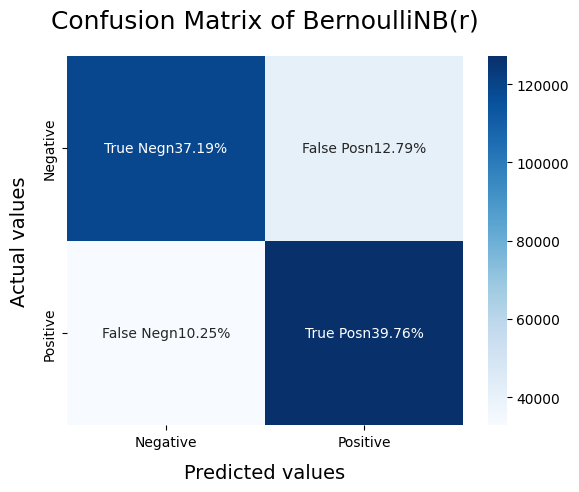

In [ ]:
model_Evaluate(BNBmodel, "BernoulliNB")

              precision    recall  f1-score   support

           0       0.78      0.75      0.76    159957
           1       0.76      0.79      0.77    160043

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000



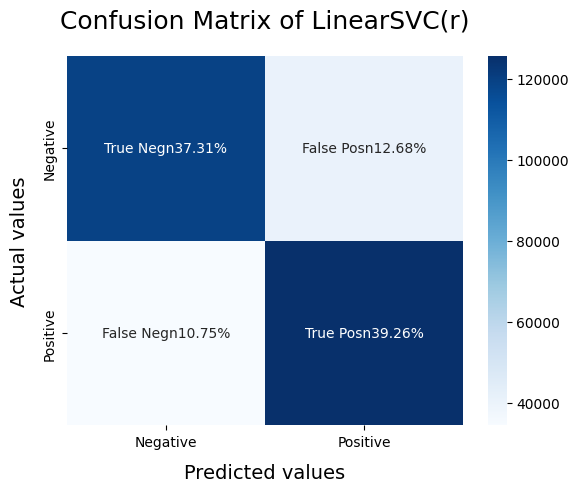

In [ ]:
model_Evaluate(SVCmodel, "LinearSVC")

              precision    recall  f1-score   support

           0       0.79      0.76      0.78    159957
           1       0.77      0.80      0.79    160043

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000



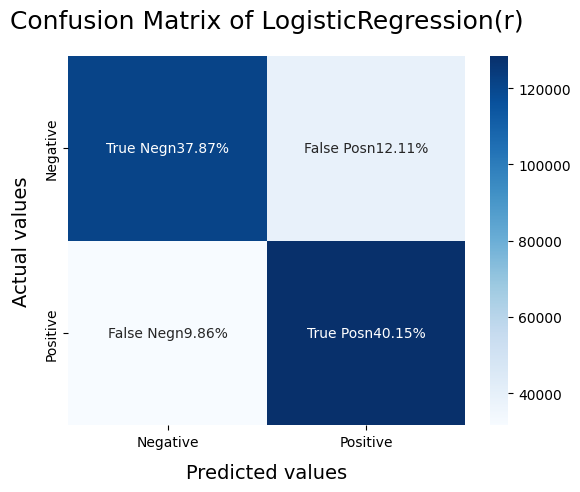

In [ ]:
model_Evaluate(LRmodel, "LogisticRegression")

              precision    recall  f1-score   support

           0       0.76      0.77      0.77    159957
           1       0.77      0.76      0.77    160043

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000



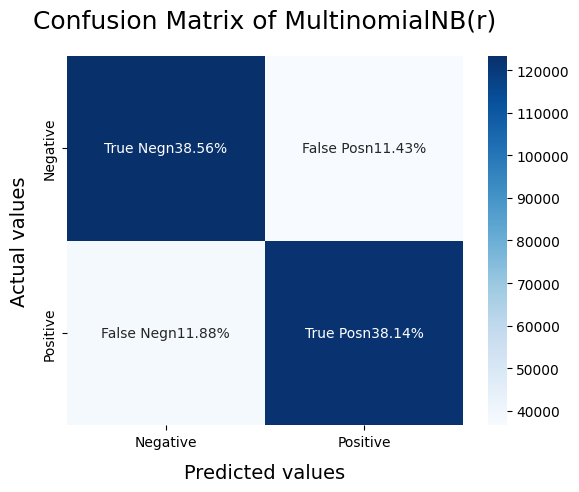

In [ ]:
model_Evaluate(MNB_model, "MultinomialNB")